# ClimadaBR tutorial

**Before starting this tutorial you should read our README.md in the doc/ClimadaBR_docs/ directory, copies of our source files are there too so take and put them in the climada SYSTEM_DIR, so that the code works (the README.md also has an explanation of how to do it).**

The files needed are:
- gpw-v4-population-count-rev11_2020_30_sec_tif foulder
- dengue_hazzards_news.xlsx
- DengueFunc.xlsx

## Creating an ClimadaBR object

Here we create an instance of the ClimadaBR class, which needs at least 2 parameters the name of the excel file with the hazard data and the name of the file with the impact function data, both files should be in the climada SYSTEM_DIR.

Other parameters can also be passed in the inicialization, they are:
- regulated (boolean): define if the during the computation process we should use a GCN to better classify the hazard file severity values; standard = False.
- use_severity_threshold (boolean): define if we should use the severity values as a threshold, eliminating events with severity below the threshold, when this option is False severity is used together with intensity to define new intensity values, where newIntensity = intensity * severity; standard = False.
- severity_threshold (float): value used as threshold when severity threshold is enabled, should be between 0 and 1; standard = 0.1 .
- by_month_only (boolean): define if the events should be grouped based on only the month they happened if True, or also group by the locations they happened if False. Should be used as True only when there are too data; standard = False.
- max_month (integer): define a max value for months which are being analised, meaning if the value is 3 the only events that will be analised was those that happened in the first 3 months of the year (january, february and march). Currently we presume the hazard file contains data of a single year; standard = 12.
- exp_lp (LitPop): if you wish you can directly pass the LitPop object needed for hazard calculation; standard = None.
- impf_set (ImpactFuncSet): if you wish you can directly pass the ImpactFuncSet object needed for hazard calculation, in this case pass any string in 'impctFunc_file'; standard = None.
- haz (Hazard): if you wish you can directly pass the Hazard object needed for hazard calculation, in this case pass any string in 'haz_file'; standard = None.

The ClimadaBR constructor will first define the Exposure using the information in the 'gpw-v4-population-count-rev11_2020_30_sec_tif' foulder. After that it will open the hazard file passed in the first argument and define the hazard, if the 'regulated = True' the hazard data will first go true a regularization trought a GCN (this step is the longest, but the whole process is usually quick). With the second argument it will open the impact function file and create a impact function set with that impact function. Finally, if all the process are done, you can compute the impact, after that you can use the methods in the next session to check the results.

In [2]:
import warnings
warnings.filterwarnings('ignore') # Makes the results cleaner

%matplotlib inline
from climada.climadaBR import *

climadabr = ClimadaBR('dengue_hazzards_news.xlsx', "DengueFunc2.xlsx", regulated=True)

Defining Exposure
2025-02-13 21:36:00,576 - climada.entity.exposures.litpop.litpop - INFO - 
 LitPop: Init Exposure for country: BRA (76)...

2025-02-13 21:36:07,790 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-13 21:36:07,791 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-13 21:36:07,845 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-13 21:36:07,846 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-13 21:36:07,941 - climada.entity.exposures.litpop.gpw_population - WARNING - Reference year: 2018. Using nearest available year for GPW data: 2020
2025-02-13 21:36:07,942 - climada.entity.exposures.litpop.gpw_population - INFO - GPW Version v4.11
2025-02-13 21:36:07,970 - climada.entity.exposures.litpop.gpw_population - WARNING - Referenc

After defining the instance of the class ClimadaBR you can use some methods to see results and other information:
- Results(): to see the results of the Climada calculation.
- Plot_Exposure(): to see the Exposure used in the calculation.
- Plot_Haz_Centroids(): to see the centroids, which are the locations where our groups of events happened.
- Plot_ImpFun(): to see the impact function used.
- haz_reg.Results_Plots(): to see the changes made to the severity values by using a GCN to better classify the events.
- print(climadabr.haz_dt), can be used to check out the dataframe with the information used to set up the Hazard.

2025-02-13 21:39:51,414 - climada.util.coordinates - INFO - Setting geometry points.
2025-02-13 21:39:51,759 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.
The impact of 2065 groups of events were analised across 303 different locations.
The events were grouped by month and location.
The results calculated by climada are the following:
Aggregated average annual impact calculated: 1100473263.0 $


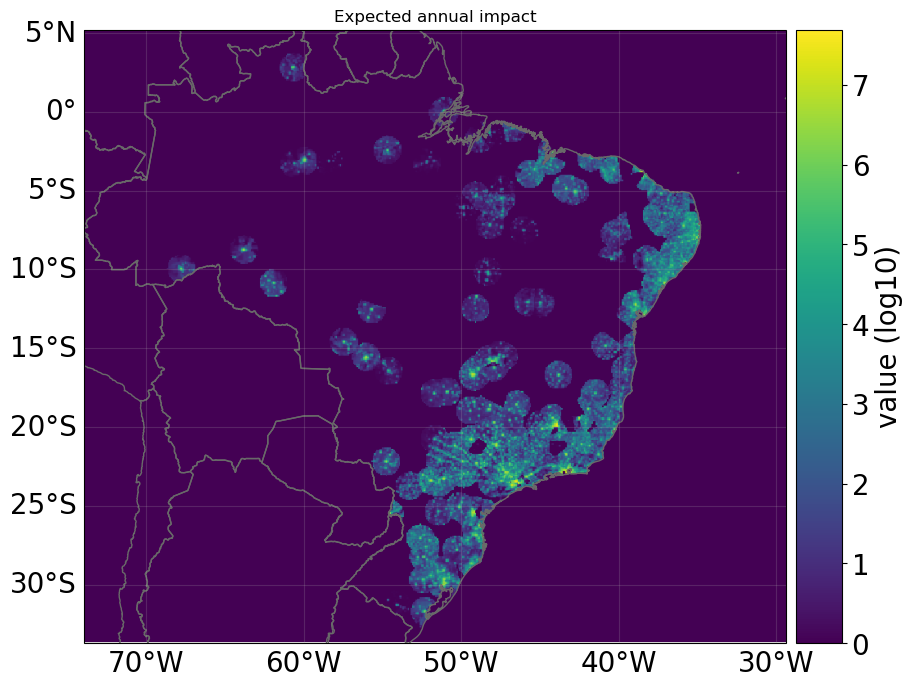

In [3]:
climadabr.Results()

2025-02-13 21:40:15,473 - climada.util.coordinates - INFO - Raster from resolution 0.08333332999999854 to 0.08333332999999854.


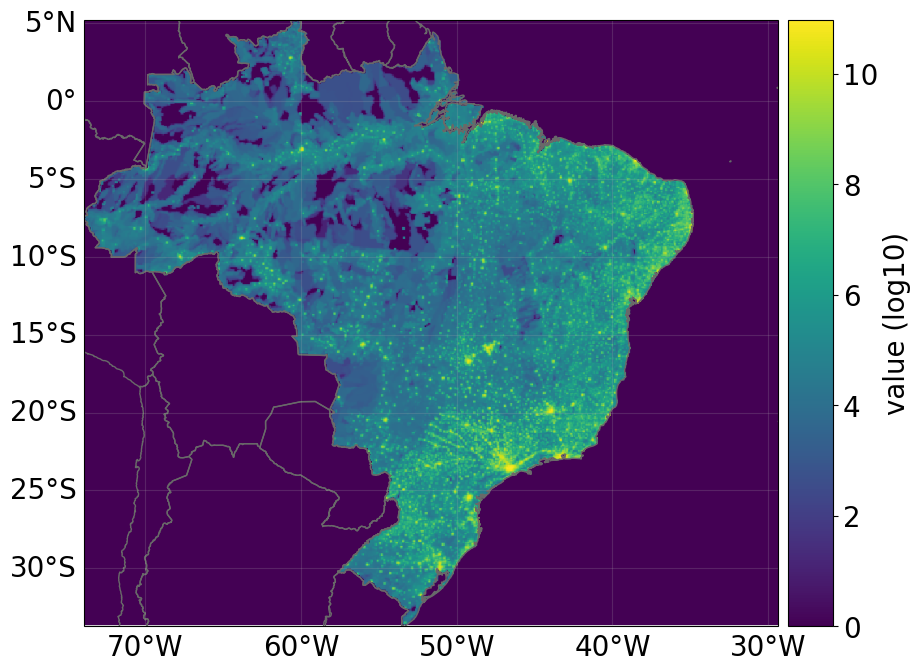

In [4]:
climadabr.Plot_Exposure()

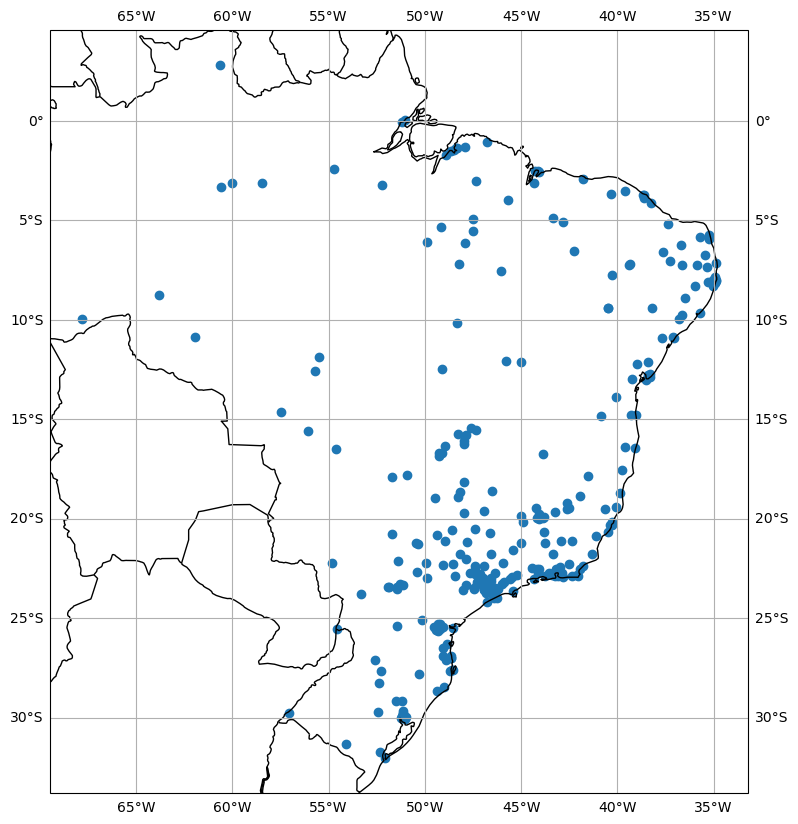

In [5]:
climadabr.Plot_Haz_Centroids()

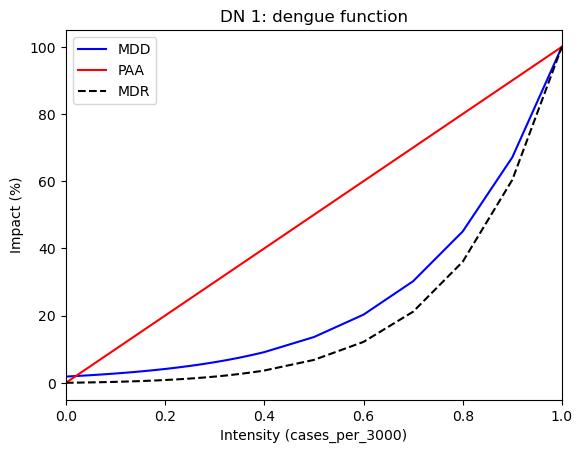

In [6]:
climadabr.Plot_ImpFun()

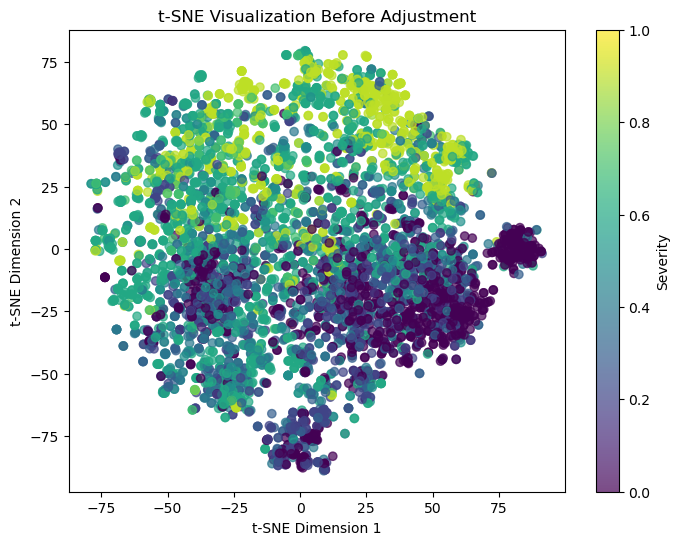

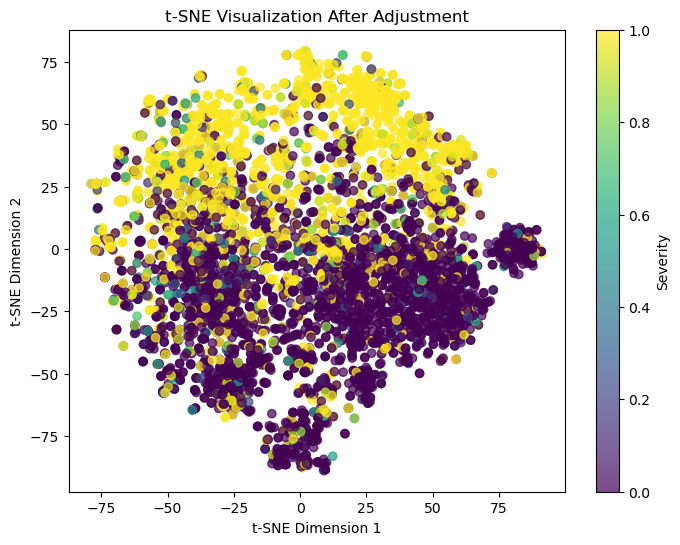

In [7]:
climadabr.haz_reg.Results_Plots()

In [8]:
print(climadabr.haz_dt)

                    event_places        lat        lon haz_type  event1  \
0          São Paulo, SP, BRAZIL -23.567387 -46.570383       DN     0.0   
1     Rio de Janeiro, RJ, BRAZIL -22.876652 -43.227875       DN     0.0   
2           Brasília, DF, BRAZIL -15.794087 -47.887905       DN     0.0   
3          Fortaleza, CE, BRAZIL  -3.723805 -38.589928       DN     0.0   
4           Salvador, BA, BRAZIL -13.014772 -38.488061       DN     0.0   
...                          ...        ...        ...      ...     ...   
2060                         NaN        NaN        NaN      NaN     NaN   
2061                         NaN        NaN        NaN      NaN     NaN   
2062                         NaN        NaN        NaN      NaN     NaN   
2063                         NaN        NaN        NaN      NaN     NaN   
2064                         NaN        NaN        NaN      NaN     NaN   

      event2  event3  event4  event5  event6  ...  event2058  event2059  \
0        0.0     0.0    